In [1]:
import h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy.optimize import curve_fit
from scipy.stats import linregress
from scipy.stats import gaussian_kde

In [2]:
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams["font.size"] = 25
color_1 = '#FF4800'
color_2 =  '#FFC300'
cmap= plt.cm.hot_r

In [3]:
db = h5py.File('ANI-aa-qmmm.h5', 'r')

# 4.1 Data set overview
## Figure 2

In [4]:
overview_columns = ['atom_types', 'am1.mull_charges','dftb.cm3_charges','dftb.mull_charges',
                    'atomic_polarizabilities_atomtype','atomic_polarizabilities_free','atomic_polarizabilities_mbis',
                    'electric_potential','pbe.mull_charges', 'sq_electric_field', 'wb97x.cm5_charges','wb97x.hirshfeld_charges', 'wb97x.mbis_charges']

In [5]:
overview_df = pd.DataFrame(columns=overview_columns)

for dataset in overview_columns:
    all_data = np.array([])
    for formula in db.keys():
        data_i = db[f'{formula}/{dataset}'][:].flatten()
        all_data = np.concatenate([all_data, data_i])
    overview_df[dataset] = all_data 

In [6]:
species = np.array([])
for formula in db.keys():    
    species_i = np.tile( db[f'{formula}/species'][:] , db[f'{formula}/coordinates'].shape[0]) 
    species = np.concatenate([species, species_i])
overview_df['species'] = species 

In [7]:
overview_df['species'] = overview_df['species'].astype('category')
overview_df['atom_types'] = overview_df['atom_types'].astype('category')

/home/jsg/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jsg/miniconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


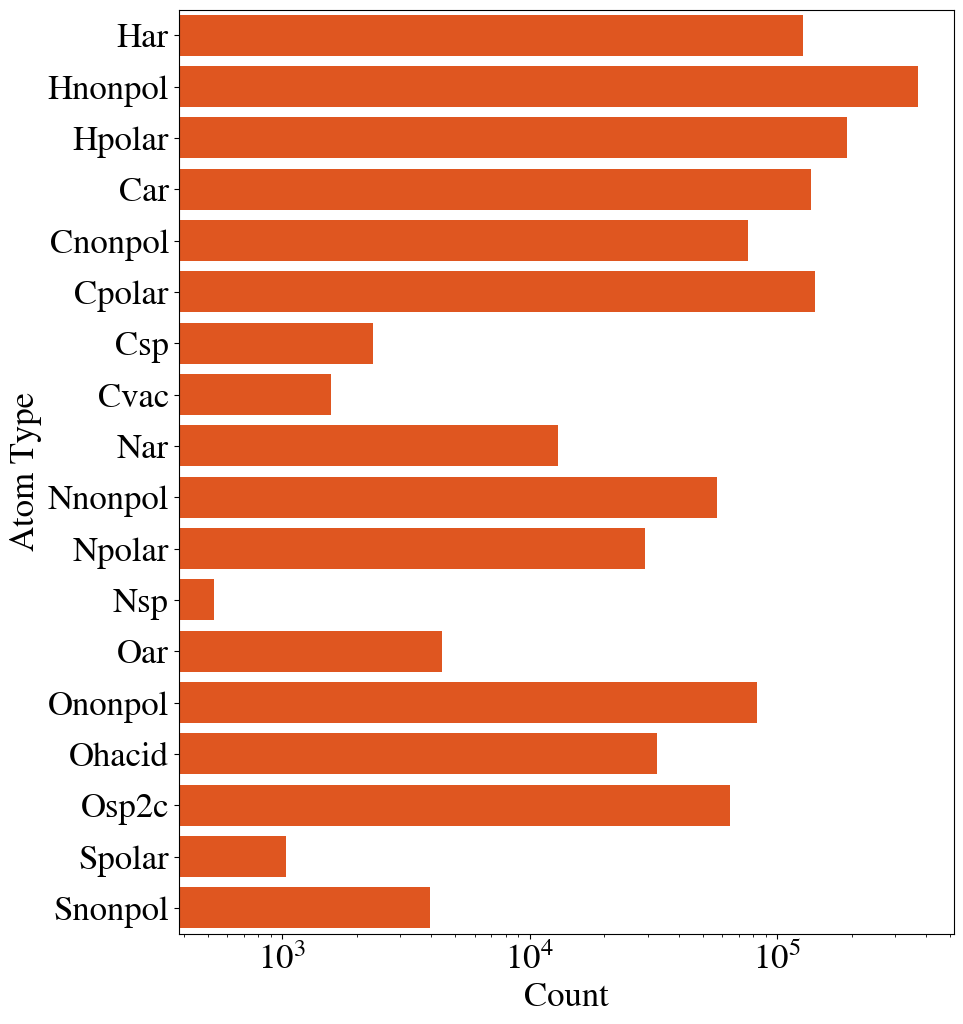

In [8]:
fig, ax = plt.subplots(figsize=(10,12), sharex=True, sharey=True)
sns.countplot(ax=ax, data=overview_df, y = 'atom_types',  color=color_1)
ax.set_yticks(np.arange(18),['Har', 'Hnonpol', 'Hpolar', 'Car', 'Cnonpol', 'Cpolar', 'Csp', 'Cvac', 'Nar', 'Nnonpol', 'Npolar',
'Nsp', 'Oar', 'Ononpol', 'Ohacid', 'Osp2c', 'Spolar', 'Snonpol'] )
ax.set_xscale('log')
ax.set_xlabel('Count')
ax.set_ylabel('Atom Type')
fig.savefig('f3Batom_types.pdf', bbox_inches='tight')

In [9]:
colors = ['#DC2F02', '#FF4800', '#FFC300','#F48C06','#D00000']

/home/jsg/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jsg/miniconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/jsg/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jsg/miniconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=Fals

(-1.2, 1.2)

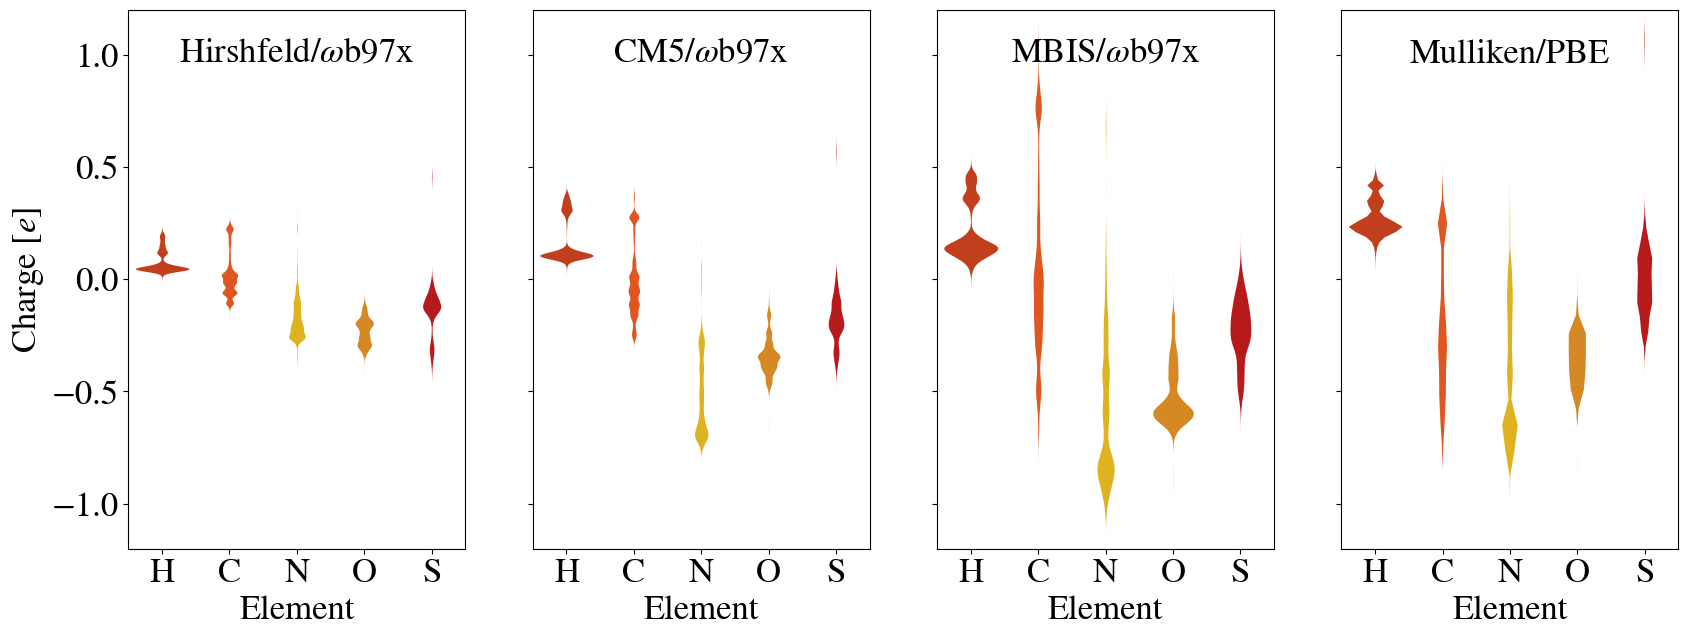

In [10]:
fig, ax = plt.subplots(ncols=4, figsize=(20,7), sharex=True, sharey=True)
ax = ax.flatten()

charges_dft = ['wb97x.hirshfeld_charges', 'wb97x.cm5_charges', 'wb97x.mbis_charges', 'pbe.mull_charges']
names = [r'Hirshfeld/$\omega$b97x', r'CM5/$\omega$b97x', r'MBIS/$\omega$b97x', r'Mulliken/PBE']
#names = ['Hirshfeld', 'CM5', 'MBIS', 'Mulliken']

for i, charge_scheme in enumerate(charges_dft):
    sns.violinplot(data=overview_df, y=charge_scheme, x='species', ax=ax[i], density_norm='width', linecolor='k', linewidth=0,inner=None, palette=colors)#'YlOrRd')
    ax[i].text(2,1,names[i],horizontalalignment='center',verticalalignment='center')#, bbox=dict(facecolor='white', alpha=0.5))
    ax[i].set_xticks([0,1,2,3,4], ['H', 'C', 'N', 'O', 'S'])
    ax[i].set_ylabel('')
    ax[i].set_xlabel('Element')
    
ax[0].set_ylabel('Charge [$e$]')
ax[0].set_ylim(-1.2,1.2)
#fig.savefig('f3c_charges.svg', bbox_inches='tight')

In [11]:
overview_df = overview_df[overview_df['sq_electric_field'] != 0]
overview_df = overview_df[overview_df['sq_electric_field']<0.05]
overview_df['sq_electric_field_V/m'] = overview_df['sq_electric_field']*(0.529177)**4*(5.14220826e11)**2

/home/jsg/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jsg/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, ' |E$_{MM}$|   [(V/m)$^2$]')

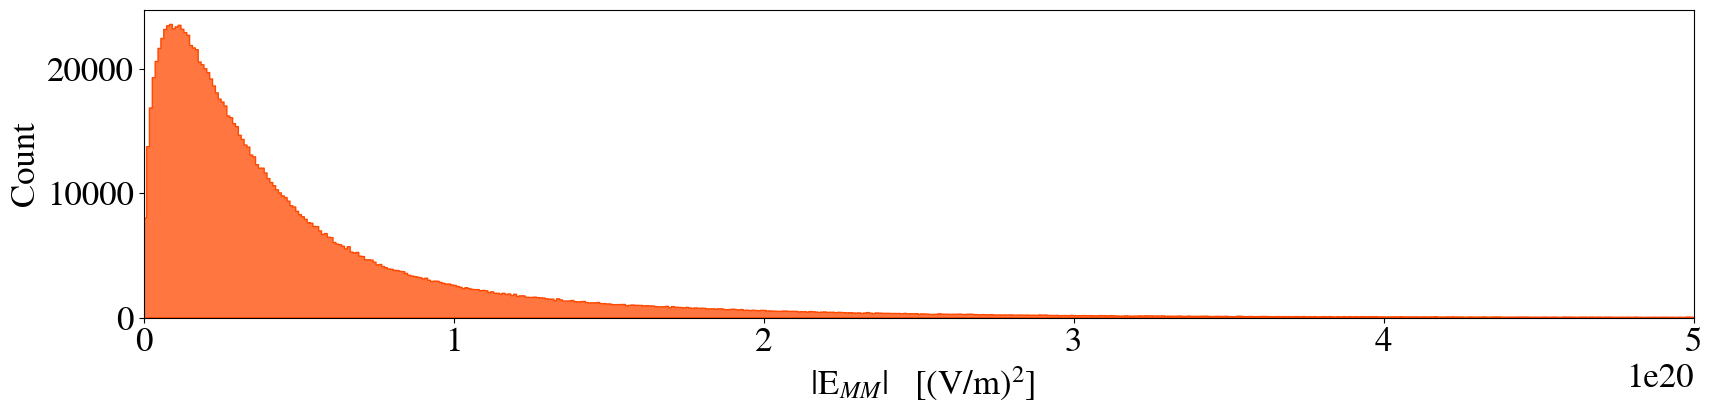

In [12]:
fig, ax = plt.subplots(figsize=(20,4))
sns.histplot(data=overview_df, x='sq_electric_field_V/m',  element='step', linewidth=1, color=color_1)
plt.xlim(-0.001,5e20)
ax.set_xlabel(' |E$_{MM}$|   [(V/m)$^2$]')
#fig.savefig('f3d_ef2.svg', bbox_inches='tight')

In [13]:
smiles = pd.DataFrame()
smiles_all = np.array([])
formula_all = np.array([])
for formula in db.keys():
    smiles_i = db[f'{formula}/smiles'][:] 
    formula_i = [formula]*len(smiles_i)
    smiles_all = np.concatenate([smiles_all, smiles_i])
    formula_all = np.concatenate([formula_all, formula_i])
smiles['smiles'] = smiles_all 
smiles['formula'] = formula_all 


In [14]:
smiles['formula'] = pd.Categorical(smiles['formula'])
#df['SMILES'] = df['B_SMILES'].str.strip("b'").apply(lambda x: x.encode('utf-8').decode('unicode_escape'))
aminoacids = [b'NCC(=O)O',                            #glicina
              b'N=C(N)NCCC[C@H](N)C(=O)O',            #arginina
              b'C[C@H](N)C(=O)O',                     #alanina
              b'C[C@@H](O)[C@H](N)C(=O)O',            #treonina
              b'N[C@@H](CCC(=O)O)C(=O)O',             #ac glutamico
              b'N[C@@H](CC(=O)O)C(=O)O',              #ac aspartico 
              b'NC(=O)CC[C@H](N)C(=O)O',              #glutamina
              b'O=C(O)[C@@H]1CCCN1',                  #prolina 
              b'CC(C)[C@H](N)C(=O)O',                 #valina
              b'N[C@@H](Cc1ccccc1)C(=O)O',            #fenilalanina
              b'CC(C)C[C@H](N)C(=O)O',                 #leucina
              b'CC[C@H](C)[C@H](N)C(=O)O',            #isoleucina
              b'N[C@@H](Cc1ccc(O)cc1)C(=O)O',         #tirosina
              b'NCCCC[C@H](N)C(=O)O',                 #lisina
              b'N[C@@H](CO)C(=O)O',                   #serina
              b'NC(=O)C[C@H](N)C(=O)O',               #asparagina
              b'N[C@@H](Cc1cncn1)C(=O)O',             #histidina
              b'N[C@@H](Cc1cnc2ccccc12)C(=O)O',       #triptofano
              b'N[C@@H](CS)C(=O)O',                   #cysteine
              b'CSCC[C@H](N)C(=O)O']                  #methionine  
 
smiles['is_aminoacid'] = smiles['smiles'].isin(aminoacids)

In [15]:
import re
def formula_to_subscript(formula):
    pattern = r"([A-Z][a-z]*)(\d+)"
    formula = re.sub(pattern, r"\1$_{\2}$", formula)
    return formula

In [16]:
f_sub = []
for formula in smiles['formula'].unique():
    f_sub.append(formula_to_subscript(formula))

/home/jsg/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jsg/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jsg/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jsg/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating i

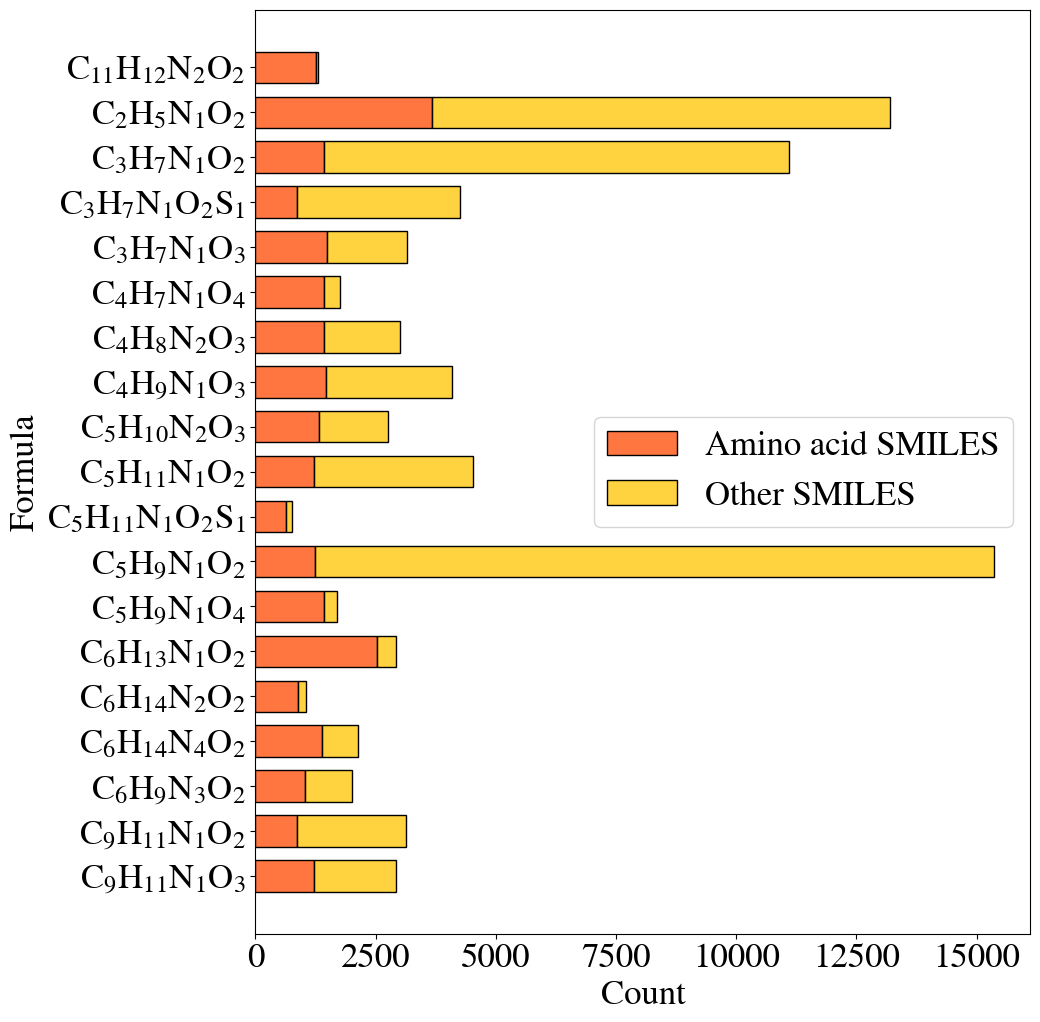

In [17]:
fig, ax = plt.subplots(figsize=(10,12), sharex=True, sharey=True)
sns.histplot(data=smiles, y = 'formula', hue='is_aminoacid', multiple="stack", palette=[color_2,color_1], ax=ax,  shrink=0.7, line_kws={'color':'r'})
ax.set_ylabel('Formula')

ax.set_yticks(range(19),f_sub)
ax.legend(title='', loc='center right', labels=['Amino acid SMILES', 'Other SMILES'])
#fig.savefig('f3a_smiles.pdf', bbox_inches='tight')

In [18]:
len(smiles)

81161

In [19]:
sum(smiles['is_aminoacid'])

26812

## 4.2 Assessment of mechanical embedding

In [20]:
def mec_emb_energy(q, V_QM):
    mec_emb_energy = np.sum(q*V_QM, axis=1) 
    mec_emb_energy = mec_emb_energy*0.529177249*627.5094740631 # from Angs^-1 to bohr ^-1 and from Ha to kcal/mol 
    return mec_emb_energy

In [21]:
charge_schemes = ['am1.mull_charges',
                  'am1.mull_charges_solvated',
'dftb.cm3_charges',
'dftb.cm3_charges_solvated',
'dftb.mull_charges',
'dftb.mull_charges_solvated',
'pbe.mull_charges',
'pbe.mull_charges_solvated',
'wb97x.cm5_charges',
'wb97x.hirshfeld_charges',
'wb97x.mbis_charges']

In [22]:
energies_df = pd.DataFrame()

In [23]:
for scheme in charge_schemes:
    mech_energy_scheme = np.array([])
    for formula in  db.keys():
        q = db[f'{formula}/{scheme}'][:]
        ep = db[f'{formula}/electric_potential'][:]
        mech_energy_i = mec_emb_energy(q, ep)
        mech_energy_scheme = np.concatenate([mech_energy_scheme, mech_energy_i])
    scheme_name = scheme.split('_')[0]+'_me_qmmm_energy'
    if 'solvated' in scheme:
        scheme_name = scheme.split('_')[0]+'solvated_me_qmmm_energy'
        print(scheme_name)
    energies_df[scheme_name] = mech_energy_scheme

am1.mullsolvated_me_qmmm_energy
dftb.cm3solvated_me_qmmm_energy
dftb.mullsolvated_me_qmmm_energy
pbe.mullsolvated_me_qmmm_energy


In [24]:
qm_energy_vac = np.array([])
qm_energy_sol = np.array([])
ee_qmmm_energy = np.array([])
formula_all = np.array([])
pol_energy_thole_free = np.array([])
pol_energy_warsh_free = np.array([])
pol_energy_apple_free = np.array([])
pol_energy_thole_at = np.array([])
pol_energy_warsh_at = np.array([])
pol_energy_apple_at = np.array([])
pol_energy_thole_mbis = np.array([])
pol_energy_warsh_mbis = np.array([])
pol_energy_apple_mbis = np.array([])

for formula in db.keys():
    ee_qmmm_energy_i = db[f'{formula}/pbe.ee_qmmm_energy'][:]
    ee_qmmm_energy = np.concatenate([ee_qmmm_energy, ee_qmmm_energy_i])

    qm_energy_vac_i = db[f'{formula}/pbe.qm_energy_vac'][:]
    qm_energy_vac = np.concatenate([qm_energy_vac, qm_energy_vac_i])
    
    qm_energy_sol_i = db[f'{formula}/pbe.qm_energy_sol'][:]
    qm_energy_sol = np.concatenate([qm_energy_sol, qm_energy_sol_i])
    
    formula_i = [formula]*len(ee_qmmm_energy_i)
    formula_all = np.concatenate([formula_all, formula_i])
    
    pol_energy_thole_free_i = db[f'{formula}/pol_energy_thole_free'][:]
    pol_energy_thole_free = np.concatenate([pol_energy_thole_free, pol_energy_thole_free_i])
    pol_energy_thole_at_i = db[f'{formula}/pol_energy_thole_atomtype'][:]
    pol_energy_thole_at = np.concatenate([pol_energy_thole_at, pol_energy_thole_at_i])
    pol_energy_thole_mbis_i = db[f'{formula}/pol_energy_thole_mbis'][:]
    pol_energy_thole_mbis = np.concatenate([pol_energy_thole_mbis, pol_energy_thole_mbis_i])

energies_df['pbe.qm_energy_vac'] = qm_energy_vac 
energies_df['pbe.qm_energy_sol'] = qm_energy_sol 
energies_df['pbe.ee_qmmm_energy'] = ee_qmmm_energy 
energies_df['formula'] = formula_all 
energies_df['thole_free'] = pol_energy_thole_free*0.529177249
energies_df['thole_atomtype'] = pol_energy_thole_at*0.529177249
energies_df['thole_mbis'] = pol_energy_thole_mbis*0.529177249

In [25]:
def pol_energy(atomic_pol, sq_elec_field):
    pol_energy = np.sum(atomic_pol*sq_elec_field, axis=1) 
    pol_energy = pol_energy*0.529177249*627.5094740631 # from Angs^-1 to bohr ^-1 and from Ha to kcal/mol 
    return pol_energy


In [26]:
atom_pol_schemes = ['atomic_polarizabilities_atomtype',
                    'atomic_polarizabilities_free',
                    'atomic_polarizabilities_mbis']

In [27]:
for scheme in atom_pol_schemes:
    pol_energy_scheme = np.array([])
    for formula in db.keys():
        atomic_pols = db[f'{formula}/{scheme}'][:]
        sq_elec_field = db[f'{formula}/sq_electric_field'][:]
        pol_energy_i = pol_energy(atomic_pols, sq_elec_field)
        pol_energy_scheme = np.concatenate([pol_energy_scheme, pol_energy_i])
    name_scheme = 'pol_energy_'+ scheme.split('_')[-1]
    energies_df[name_scheme] = pol_energy_scheme

In [28]:
me_schemes = ['am1.mull_me_qmmm_energy', 'dftb.cm3_me_qmmm_energy',
              'dftb.mull_me_qmmm_energy', 'pbe.mull_me_qmmm_energy',
              'wb97x.cm5_me_qmmm_energy', 'wb97x.hirshfeld_me_qmmm_energy',
              'wb97x.mbis_me_qmmm_energy']

pol_energies = ['pol_energy_atomtype', 'pol_energy_free', 'pol_energy_mbis']

In [29]:
for me_sc in me_schemes:
    for at_p_sc in pol_energies:
        me_p_energy = energies_df[me_sc] - (1/2) * energies_df[at_p_sc]
        name_scheme = me_sc.split('_')[0] + '_me_pol_' + at_p_sc.split('_')[-1]
        energies_df[name_scheme] = me_p_energy

In [30]:
pol_energies_2 = ['thole']

In [31]:
epsilons =[1.0, 2.0]

In [32]:
for me_sc in me_schemes:
    for atom_pol in atom_pol_schemes:
        for epsilon in epsilons:
            name_pol = 'thole_'+ atom_pol.split('_')[-1]
            me_p_energy = energies_df[me_sc] + (1/epsilon) * energies_df[name_pol]
            name_scheme = me_sc.split('_')[0] +'_'+ name_pol
            if epsilon == 2.0:
                name_scheme = name_scheme+'_epsilon2'
            energies_df[name_scheme] = me_p_energy

In [33]:
energies_df['pbe.delta_qm_energy'] = energies_df['pbe.qm_energy_sol'] - energies_df['pbe.qm_energy_vac']
energies_df['pbe.delta_qm+ee_qmmm'] = energies_df['pbe.delta_qm_energy'] +   energies_df['pbe.ee_qmmm_energy']

In [34]:
def find_outliers(df, formula, column, k):
    df_formula = df[df['formula']==formula]
    mean = np.mean(df_formula[column]) 
    std = np.std(df_formula[column])
    Q_low = mean - k * std
    Q_up = mean + k * std
    outliers_formula = df_formula[(df_formula[column] < Q_low) | (df_formula[column] > Q_up)]
    df = df[~df.isin(outliers_formula)].dropna()
    outliers = df[df.isin(outliers_formula)].dropna()
    return df, outliers

In [35]:
outliers = pd.DataFrame()
for formula in energies_df.formula.unique():
    for column in ['pbe.qm_energy_vac',  'pbe.qm_energy_sol', 'pbe.ee_qmmm_energy',  'pol_energy_free', 'pbe.delta_qm_energy', 'pbe.delta_qm+ee_qmmm', 'thole_free']:
        energies_df, outliers_ = find_outliers(energies_df, formula, column, 4)
        outliers = pd.concat([outliers, outliers_])

In [36]:
def lineal(x,a,b):
     return a*x+b

def norm(x,y):
    return (x-y)/y

In [37]:
schemes_list = ['wb97x.hirshfeld_me_qmmm_energy',
'wb97x.cm5_me_qmmm_energy',
'wb97x.mbis_me_qmmm_energy',
'pbe.mull_me_qmmm_energy',
'am1.mull_me_qmmm_energy',
'dftb.cm3_me_qmmm_energy',
'dftb.mull_me_qmmm_energy',
'wb97x.mbis_me_pol_free',
'wb97x.mbis_me_pol_atomtype',
'wb97x.mbis_me_pol_mbis',
'pbe.mull_thole_atomtype',
'pbe.mull_thole_free',
'pbe.mull_thole_mbis',
'wb97x.cm5_thole_atomtype',
'wb97x.cm5_thole_free',
'wb97x.cm5_thole_mbis',
'wb97x.hirshfeld_thole_atomtype',
'wb97x.hirshfeld_thole_free',
'wb97x.hirshfeld_thole_mbis',
'wb97x.mbis_thole_atomtype',
'wb97x.mbis_thole_free',
'wb97x.mbis_thole_mbis',
'wb97x.mbis_thole_atomtype_epsilon2',
'wb97x.mbis_thole_free_epsilon2',
'wb97x.mbis_thole_mbis_epsilon2']

In [38]:
norm_energies_df = pd.DataFrame()

In [39]:
for scheme in schemes_list:
    norm_energies_df[scheme] = norm(energies_df[scheme], energies_df['pbe.ee_qmmm_energy'])

In [40]:
# Create an empty dictionary to store the linear parameters for each column
linear_params = {}
# Loop through each column in the data frame
for scheme in schemes_list:
    # Compute the linear regression parameters for the column
    slope, intercept, r_value, p_value, std_err = linregress(energies_df['pbe.ee_qmmm_energy'], energies_df[scheme])
    # Add the linear parameters to the dictionary
    linear_params[scheme] = {"slope": slope, "intercept": intercept, "r_value": r_value, "p_value": p_value, "std_err": std_err}


In [41]:
def calc_estad(df, scheme_REF, scheme, cutoff , linear_params):
    prom = np.mean(np.abs(df[scheme]- df[scheme_REF]))
    desvio = np.std(df[scheme]- df[scheme_REF])
    rmsd = np.sqrt( np.sum( (df[scheme] - df[scheme_REF]) **2 ) / len(df[scheme])  )
    slope = linear_params[scheme]['slope']
    interc = linear_params[scheme]['intercept']
    MAE_intra = np.sum(np.abs((df[scheme] - ( slope * df[scheme_REF] + interc)) / ( slope * df[scheme_REF] + interc))) / len(df[scheme])
    MAE_id = np.sum(np.abs((df[scheme] - df[scheme_REF]) / df[scheme_REF]))  / len(df[scheme])
    return(scheme, prom, desvio, rmsd, MAE_intra, MAE_id)

In [42]:
stats = pd.DataFrame(columns=['scheme', 'err prom', 'err desvio', 'rmsd', 'MAE_INTRA', 'MAE_IDENTITY'])

for scheme in schemes_list:
    stats.loc[len(stats.index)] = calc_estad(energies_df,'pbe.ee_qmmm_energy', scheme, 0.05, linear_params)

# Figure 4

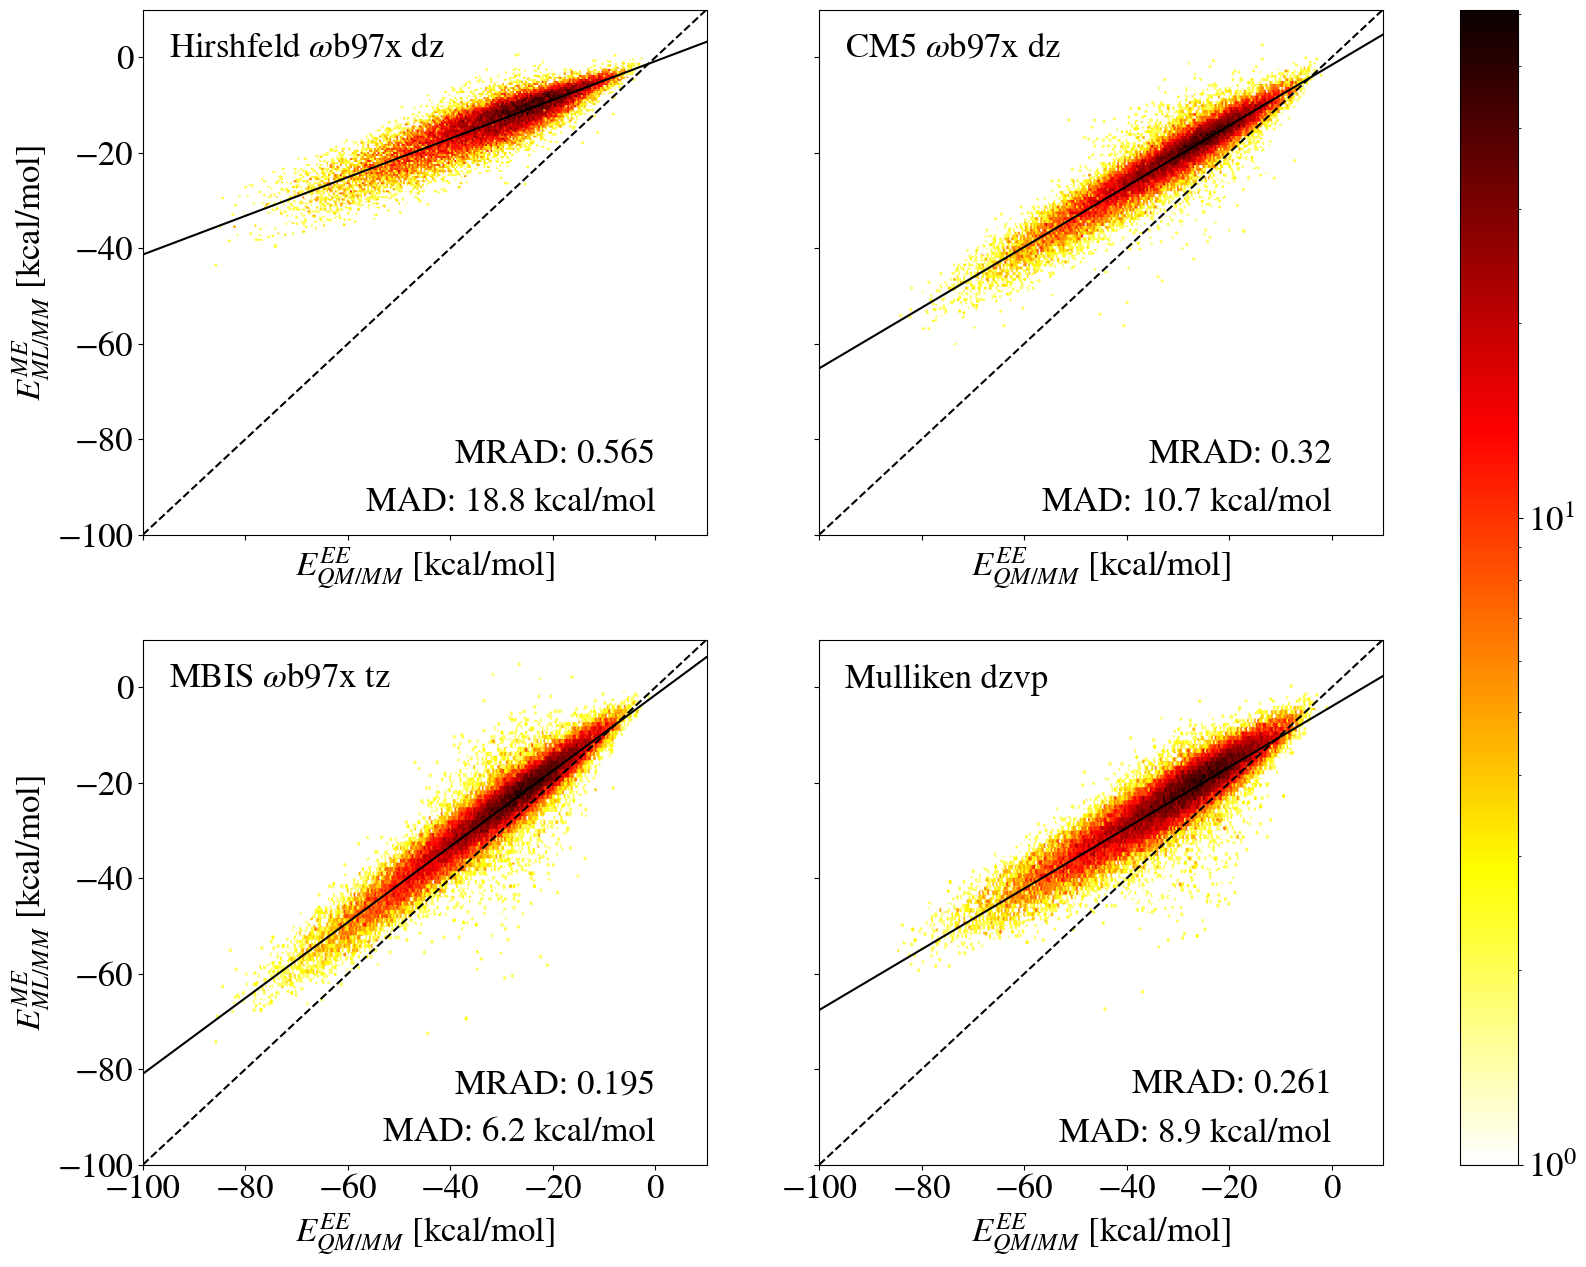

In [43]:
fig, ax = plt.subplots(nrows=2, ncols= 2, figsize=(20,15), sharex=True, sharey=True)
ax = ax.flatten()
ax[0].set_ylabel('$E_{ML/MM}^{ME}$ [kcal/mol]')
ax[2].set_ylabel('$E_{ML/MM}^{ME}$ [kcal/mol]')

[ax[i].set_xlabel('$E_{QM/MM}^{EE}$ [kcal/mol]') for i in [0,1,2,3]]
min_ = -100
max_ = 10
label_x=-90
label_y=-15
ax[0].set_xlim(min_, max_)
ax[0].set_ylim(min_, max_)
line_color = 'k'

for i, scheme in enumerate(['Hirshfeld $\omega$b97x dz', 'CM5 $\omega$b97x dz', 'MBIS $\omega$b97x tz', 'Mulliken dzvp']):
    ax[i].text(-95, 0, s=scheme)

for i,scheme in enumerate(['wb97x.hirshfeld_me_qmmm_energy', 'wb97x.cm5_me_qmmm_energy', 'wb97x.mbis_me_qmmm_energy', 'pbe.mull_me_qmmm_energy']):
    abc = ax[i].hexbin(energies_df['pbe.ee_qmmm_energy'],energies_df[scheme], cmap='hot_r', bins='log', gridsize=300)
    ax[i].plot(np.array([min_, max_]), lineal(np.array([min_, max_]), linear_params[scheme]['slope'], linear_params[scheme]['intercept']) , c=line_color,zorder=1)
    ax[i].plot([min_, max_],[min_, max_],ls='--', c=line_color)
    ax[i].set_xticks(np.arange(min_, max_, step=20))
    ax[i].text(0, -95, f'MAD: '+str(stats[stats['scheme']==scheme]['err prom'].values[0].round(1))+' kcal/mol' , horizontalalignment='right')
    ax[i].text(0, -85, f'MRAD: '+str(stats[stats['scheme']==scheme]['MAE_IDENTITY'].values[0].round(3)), horizontalalignment='right')

fig.colorbar(abc, ax=ax.ravel().tolist())

#fig.savefig('f4_corr_ME.png', bbox_inches='tight')

# 4.3 Assessment of polarizable mechanical embedding
## Figure 5

In [44]:
f5_schemes =['wb97x.mbis_me_qmmm_energy', 'wb97x.mbis_me_pol_free',
             'wb97x.mbis_me_pol_atomtype', 'wb97x.mbis_me_pol_mbis']

# Figure 5

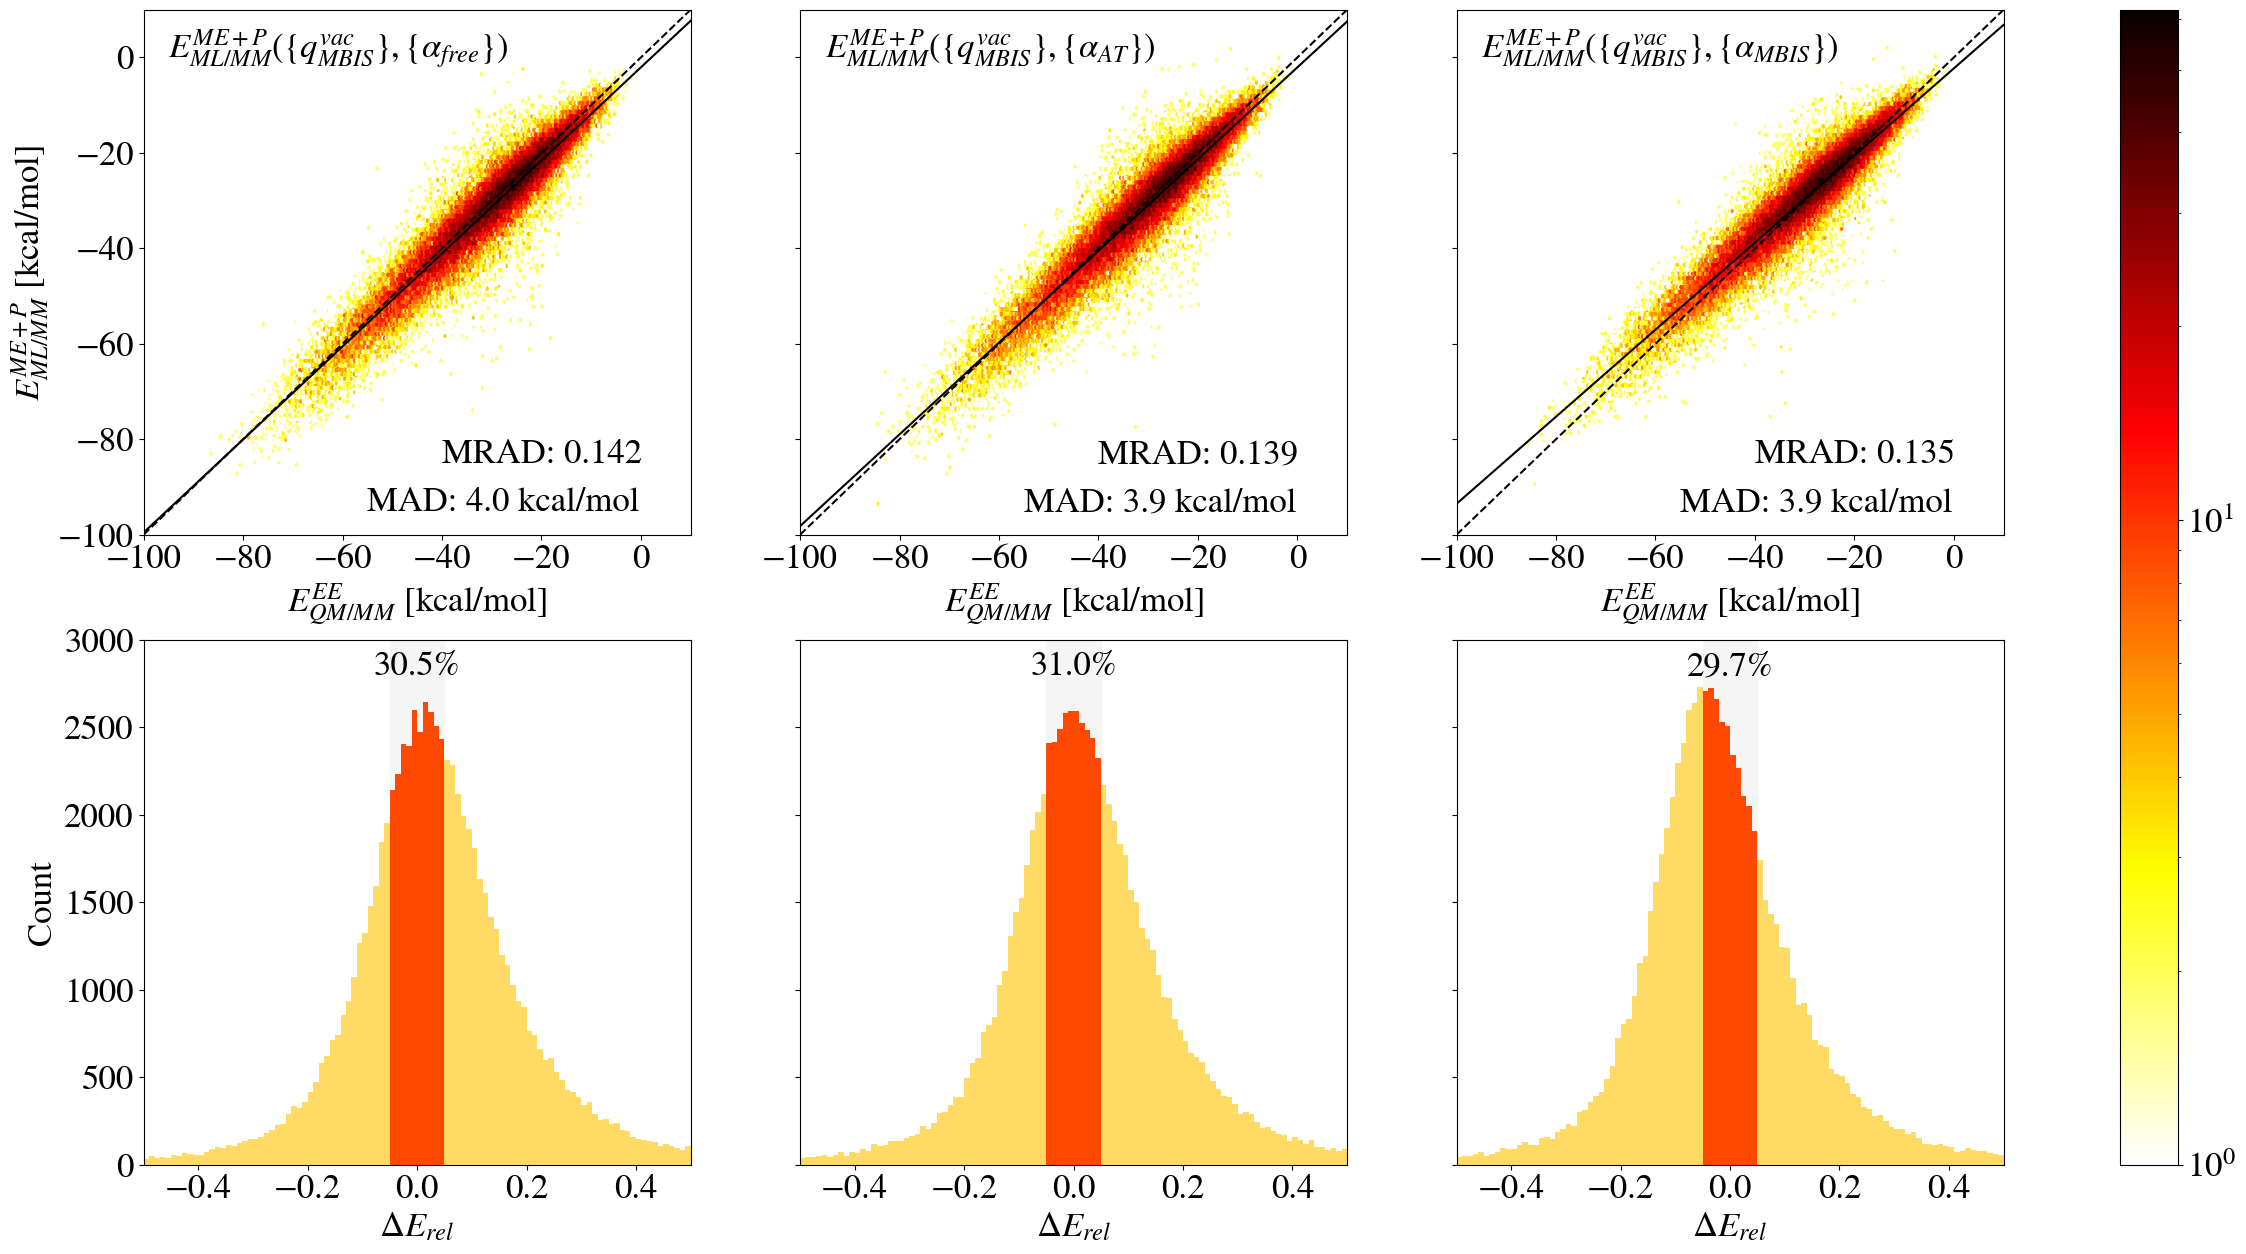

In [45]:
fig, ax = plt.subplots(nrows=2, ncols= 3, figsize=(30,15), sharex='row', sharey='row')

bins=100
data_min = -0.5
data_max =0.5
bins = np.histogram_bin_edges((data_min, data_max), bins=bins)
ylabel=3250
corte=0.05

for i, scheme in enumerate(['$E_{ML/MM}^{ME+P} (\{q^{vac}_{MBIS}\} , \{ \\alpha_{free}\})$',
                             '$E_{ML/MM}^{ME+P} (\{q^{vac}_{MBIS}\} , \{ \\alpha_{AT}\})$',
                            '$E_{ML/MM}^{ME+P} (\{q^{vac}_{MBIS}\} , \{ \\alpha_{MBIS}\})$']):
    ax[0,i].text(-95, 0, scheme )

ax[0,0].set_ylabel('$E_{ML/MM}^{ME+P}$ [kcal/mol]')
ax[1,0].set_ylabel('Count')

min_ = -100
max_ = 10
label_x=-90
label_y=-15
scheme_ref = 'pbe.ee_qmmm_energy'
x = energies_df[scheme_ref]
nbins=40

for i, scheme in enumerate([ 'wb97x.mbis_me_pol_free',  'wb97x.mbis_me_pol_atomtype', 'wb97x.mbis_me_pol_mbis']):
    abc = ax[0,i].hexbin(energies_df['pbe.ee_qmmm_energy'],energies_df[scheme], cmap='hot_r', bins='log', gridsize=300)
    ax[0,i].plot(np.array([min_, max_]), lineal(np.array([min_, max_]), linear_params[scheme]['slope'], linear_params[scheme]['intercept']) , c=line_color,zorder=1)
    ax[0,i].plot([min_, max_],[min_, max_],ls='--', c=line_color)
    ax[0,i].set_xticks(np.arange(min_, max_, step=20))
    ax[0,i].text(-55, -95, f'MAD: '+str(stats[stats['scheme']==scheme]['err prom'].values[0].round(1))+' kcal/mol' )
    ax[0,i].text(-40, -85, f'MRAD: '+str(stats[stats['scheme']==scheme]['MAE_IDENTITY'].values[0].round(3)))
    ax[0,i].set_xlim(min_, max_)
    ax[0,i].set_ylim(min_, max_)
    ax[0,i].set_xlabel('$E_{QM/MM}^{EE}$ [kcal/mol]')
    ax[1,i].set_xlabel('$\\Delta E _{rel}$')
    ax[1,i].set_xlim(-0.5, 0.5)
    ax[1,i].set_ylim(0, 3000)
    prom = np.mean(norm_energies_df[scheme])
    desvio = np.std(norm_energies_df[scheme])
    porcentaje_aceptado = 100*(np.count_nonzero(((energies_df[scheme] - energies_df[scheme_ref])/energies_df[scheme_ref] > -corte) & ((energies_df[scheme] - energies_df[scheme_ref])/energies_df[scheme_ref] < corte)))/len(energies_df)
    ax[1,i].hist(norm_energies_df[scheme], bins=bins, color=color_2, alpha=0.6)
    ax[1,i].hist(norm_energies_df[scheme][(norm_energies_df[scheme] > - corte) & (norm_energies_df[scheme] < corte)], color=color_1, bins=bins)
    ax[1,i].text(0,2800, f'{porcentaje_aceptado:.1f}%', fontsize=25, ha='center', zorder=1)
    ax[1,i].fill_between(np.array([-corte,corte]), 0, 3000, color='whitesmoke', zorder=0)
fig.colorbar(abc, ax=ax.ravel().tolist())
#fig.savefig('f5_corr_ME+P.png', bbox_inches='tight')

# Figure 6

In [46]:
x = energies_df['pbe.mullsolvated_me_qmmm_energy']

schemes_list_mull = ['pbe.mull_me_pol_free', 'pbe.mull_thole_free'] 
linear_params_mull = {}

for scheme in schemes_list_mull:
    slope, intercept, r_value, p_value, std_err = linregress(x, energies_df[scheme])
    linear_params_mull[scheme] = {"slope": slope, "intercept": intercept, "r_value": r_value, "p_value": p_value, "std_err": std_err}

stats_mull = pd.DataFrame(columns=['scheme', 'err prom', 'err desvio', 'rmsd', 'MAE_INTRA', 'MAE_IDENTITY'])
for col in schemes_list_mull:
    stats_mull.loc[len(stats_mull.index)] = calc_estad(energies_df, 'pbe.mullsolvated_me_qmmm_energy', col, 0.05, linear_params_mull)

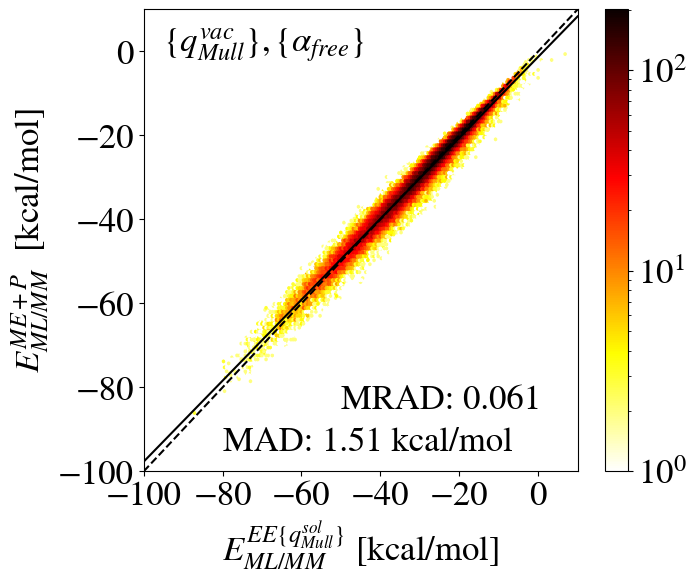

In [47]:
fig, ax = plt.subplots(figsize=(7,6))
ax.set_ylabel('$E_{ML/MM}^{ME+P}$  [kcal/mol]')
ax.set_xlabel('$E_{ML/MM}^{EE \{q^{sol}_{Mull}\}}$ [kcal/mol]')
min_ = -100
max_ = 10
label_x=-90
label_y=-15

ax.set_xlim(min_, max_)
ax.set_ylim(min_, max_)
line_color = 'k'
ax.set_xticks(np.arange(min_, max_, step=20))
ax.text(-95, 0,  '$\{q^{vac}_{Mull}\}, \{\\alpha_{free}\}$')

scheme = 'pbe.mull_me_pol_free'
abc = ax.hexbin(energies_df['pbe.mullsolvated_me_qmmm_energy'],energies_df[scheme], cmap='hot_r', bins='log', gridsize=300)
ax.text(-80, -95, f'MAD: '+str(stats_mull[stats_mull['scheme']==scheme]['err prom'].values[0].round(2))+' kcal/mol' )
ax.text(-50, -85, f'MRAD: '+str(stats_mull[stats_mull['scheme']==scheme]['MAE_IDENTITY'].values[0].round(3)))
ax.plot(np.array([min_, max_]), lineal(np.array([min_, max_]), linear_params_mull[scheme]['slope'], linear_params_mull[scheme]['intercept']) , c=line_color,zorder=1)
ax.plot([min_, max_],[min_, max_],ls='--', c=line_color)
fig.colorbar(abc)#, ax=ax.ravel().tolist())

#fig.savefig('f6_corr_sol_vac.png', bbox_inches='tight')

# Suplementary

## Figure S2

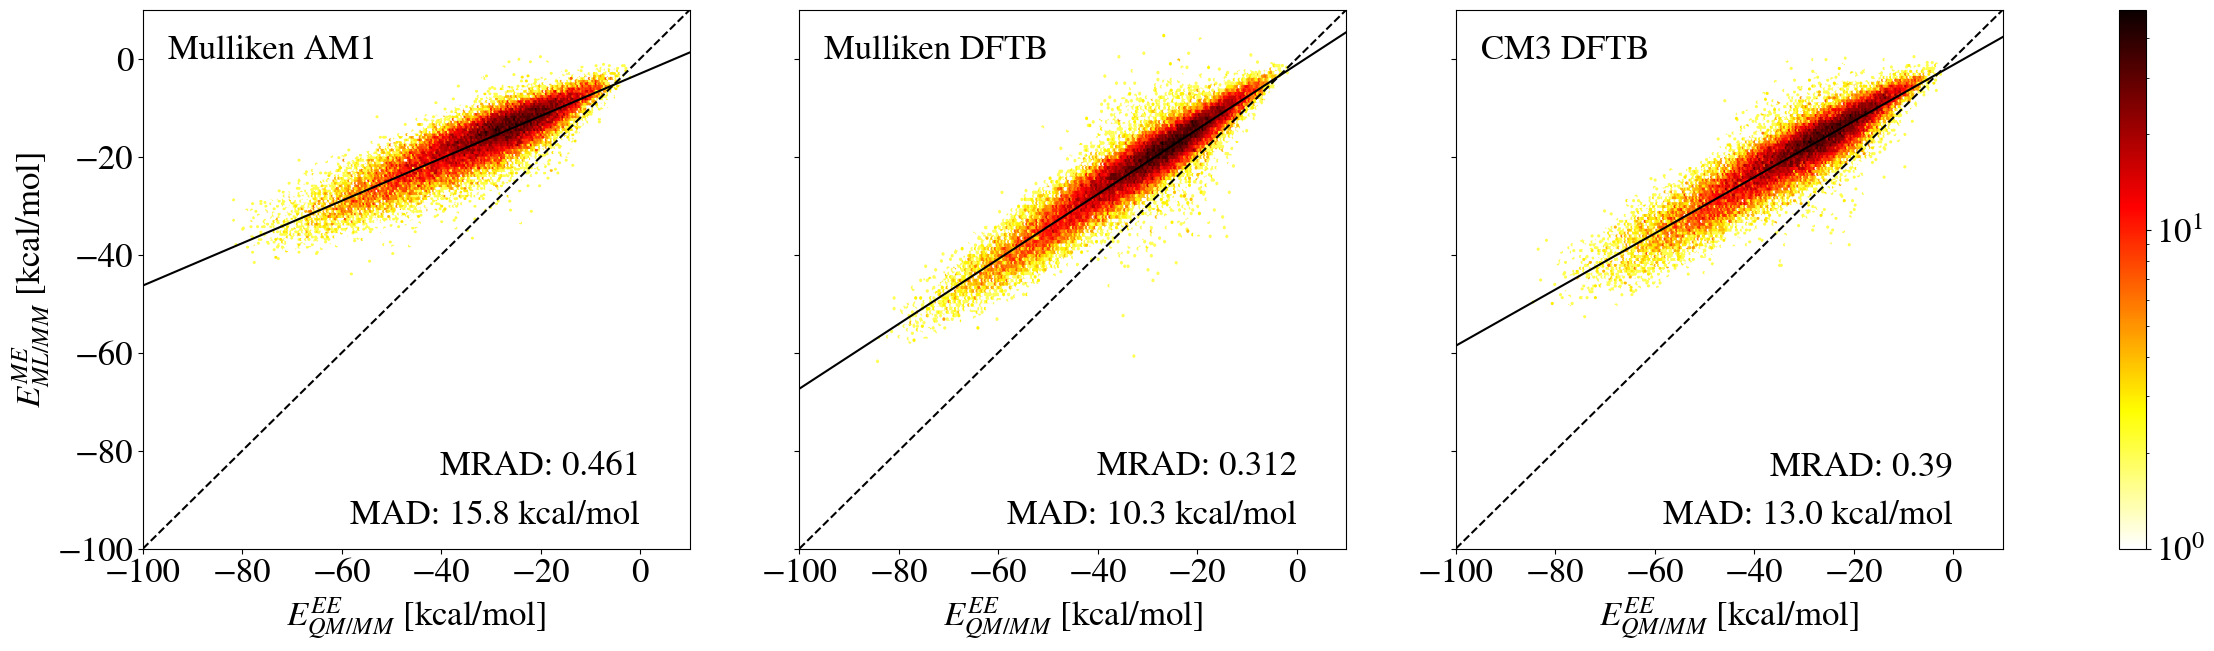

In [59]:
fig, ax = plt.subplots(ncols= 3, figsize=(30,7), sharex=True, sharey=True)
ax = ax.flatten()
ax[0].set_ylabel('$E_{ML/MM}^{ME}$ [kcal/mol]') 
[ax[i].set_xlabel('$E_{QM/MM}^{EE}$ [kcal/mol]') for i in [0,1,2]]
min_ = -100
max_ = 10
label_x=-90
label_y=-15
ax[0].set_xlim(min_, max_)
ax[0].set_ylim(min_, max_)
line_color = 'k'

for i, scheme in enumerate(['Mulliken AM1', 'Mulliken DFTB', 'CM3 DFTB']):
    ax[i].text(-95, 0, scheme)

for i,scheme in enumerate(['am1.mull_me_qmmm_energy', 'dftb.cm3_me_qmmm_energy', 'dftb.mull_me_qmmm_energy']):
    abc = ax[i].hexbin(energies_df['pbe.ee_qmmm_energy'],energies_df[scheme], cmap='hot_r', bins='log', gridsize=300)
    ax[i].plot(np.array([min_, max_]), lineal(np.array([min_, max_]), linear_params[scheme]['slope'], linear_params[scheme]['intercept']) , c=line_color,zorder=1)
    ax[i].plot([min_, max_],[min_, max_],ls='--', c=line_color)
    ax[i].set_xticks(np.arange(min_, max_, step=20))
    ax[i].text(0, -95, f'MAD: '+str(stats[stats['scheme']==scheme]['err prom'].values[0].round(1))+' kcal/mol' , horizontalalignment='right')
    ax[i].text(0, -85, f'MRAD: '+str(stats[stats['scheme']==scheme]['MAE_IDENTITY'].values[0].round(3)), horizontalalignment='right')

fig.colorbar(abc, ax=ax.ravel().tolist())

fig.savefig('FS2corr_SE.png', bbox_inches='tight')

## Figure S3

In [49]:
df_selection = pd.read_csv('pbe_vs_wb97x.csv')

In [50]:
linear_params_mbis = {}
schemes_list_mbis = ['ME_wb97x','ME_wb97x+PT','ME_wb97x+PL', 'ME_PBE', 'ME_PBE+PT', 'ME_PBE+PL']
for scheme in schemes_list_mbis:
    x = df_selection.EE
    y = df_selection[scheme]
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    linear_params_mbis[scheme] = {"slope": slope, "intercept": intercept, "r_value": r_value, "p_value": p_value, "std_err": std_err}

In [51]:
stats_mbis = pd.DataFrame(columns=['scheme', 'err prom', 'err desvio', 'rmsd', 'MAE_intra', 'MAE_IDENTITY'])

for col in ['ME_PBE', 'ME_wb97x', 'ME_wb97x+PT', 'ME_wb97x+PL', 'ME_PBE+PT', 'ME_PBE+PL']:
    stats_mbis.loc[len(stats_mbis.index)] = calc_estad(df_selection, 'EE', col, 0.05, linear_params_mbis)

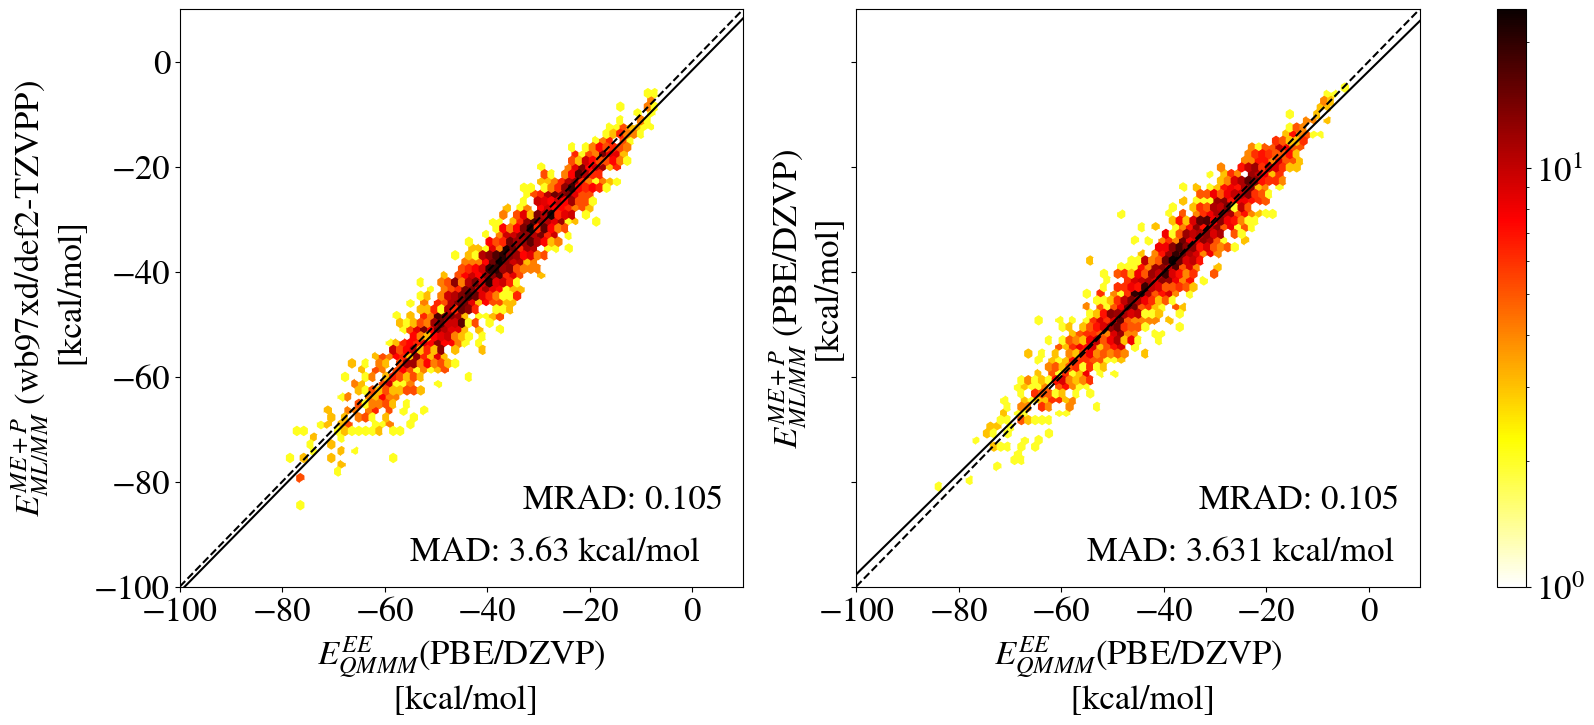

In [52]:
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize=(20,7.5), sharex=True, sharey=True)

ax[0].set_ylabel('$E_{ML/MM}^{ME+P}$ (wb97xd/def2-TZVPP)\n [kcal/mol]')
ax[1].set_ylabel('$E_{ML/MM}^{ME+P}$ (PBE/DZVP)\n  [kcal/mol]')

[ax[i].set_xlabel('$E_{QMMM}^{EE} $(PBE/DZVP)\n [kcal/mol]') for i in [0,1]]

min_ = -100
max_ = 10

ax[0].set_xlim(min_, max_)
ax[0].set_ylim(min_, max_)
line_color = 'k'

for i,scheme in enumerate(['ME_wb97x+PT', 'ME_PBE+PT']):
    x = df_selection.EE
    y = df_selection[scheme]
    abc = ax[i].hexbin(x, y, cmap='hot_r', gridsize=60, bins='log')
    ax[i].plot(np.array([min_, max_]), lineal(np.array([min_, max_]), linear_params_mbis[scheme]['slope'], linear_params_mbis[scheme]['intercept']) , c=line_color,zorder=1)
    ax[i].plot([min_, max_],[min_, max_],ls='--', c=line_color)
    ax[i].set_xticks(np.arange(min_, max_, step=20))
    ax[i].text(-55, -95, f'MAD: '+str(stats_mbis[stats_mbis['scheme']==scheme]['err prom'].values[0].round(3))+' kcal/mol' )
    ax[i].text(-33, -85, f'MRAD: '+str(stats_mbis[stats_mbis['scheme']==scheme]['MAE_IDENTITY'].values[0].round(3)))

fig.colorbar(abc, ax=ax.ravel().tolist())
#fig.savefig('FS3_corr_functionals.png', bbox_inches='tight')

## Figure S4

In [53]:
f7_schemes = [ 'q_mbis_alpha_free_me_pol_dist_energy', 'q_mbis_alpha_mbis_me_pol_dist_energy', 'wb97x.mbis_me_pol_free',  'pbe.mull_thole_atomtype',
'pbe.mull_thole_free',
'pbe.mull_thole_mbis',
'wb97x.cm5_thole_atomtype',
'wb97x.cm5_thole_free',
'wb97x.cm5_thole_mbis',
'wb97x.hirshfeld_thole_atomtype',
'wb97x.hirshfeld_thole_free',
'wb97x.hirshfeld_thole_mbis',
'wb97x.mbis_thole_atomtype',
'wb97x.mbis_thole_free',
'wb97x.mbis_thole_free_epsilon2',
'wb97x.mbis_thole_mbis'] 

In [54]:
energies_df['q_mbis_alpha_free_me_pol_dist_energy'] =  energies_df['wb97x.mbis_me_qmmm_energy'] - 0.25 * energies_df['pol_energy_free']
energies_df['q_mbis_alpha_mbis_me_pol_dist_energy'] =  energies_df['wb97x.mbis_me_qmmm_energy'] - 0.25 * energies_df['pol_energy_mbis']


df_norm_qm = pd.DataFrame()
df_norm_qm['wb97x.mbis_me_pol_free'] =  norm(energies_df['wb97x.mbis_me_pol_free'], energies_df['pbe.delta_qm+ee_qmmm'])
df_norm_qm['q_mbis_alpha_free_me_pol_dist_energy'] =  norm(energies_df['q_mbis_alpha_free_me_pol_dist_energy'], energies_df['pbe.delta_qm+ee_qmmm'])
df_norm_qm['q_mbis_alpha_mbis_me_pol_dist_energy'] =  norm(energies_df['q_mbis_alpha_mbis_me_pol_dist_energy'], energies_df['pbe.delta_qm+ee_qmmm'])

df_norm_qm['wb97x.hirshfeld_thole_free'] = norm(energies_df['wb97x.hirshfeld_thole_free'], energies_df['pbe.delta_qm+ee_qmmm'])
df_norm_qm['wb97x.cm5_thole_free']       = norm(energies_df['wb97x.cm5_thole_free'], energies_df['pbe.delta_qm+ee_qmmm'])
df_norm_qm['wb97x.mbis_thole_free']      = norm(energies_df['wb97x.mbis_thole_free'], energies_df['pbe.delta_qm+ee_qmmm'])
df_norm_qm['wb97x.mbis_thole_free_epsilon2'] = norm(energies_df['wb97x.mbis_thole_free_epsilon2'], energies_df['pbe.delta_qm+ee_qmmm'])
df_norm_qm['pbe.mull_thole_free']        = norm(energies_df['pbe.mull_thole_free'], energies_df['pbe.delta_qm+ee_qmmm'])

df_norm_qm['wb97x.hirshfeld_thole_atomtype'] = norm(energies_df['wb97x.hirshfeld_thole_atomtype'], energies_df['pbe.delta_qm+ee_qmmm'])
df_norm_qm['wb97x.cm5_thole_atomtype']       = norm(energies_df['wb97x.cm5_thole_atomtype'], energies_df['pbe.delta_qm+ee_qmmm'])
df_norm_qm['wb97x.mbis_thole_atomtype']      = norm(energies_df['wb97x.mbis_thole_atomtype'], energies_df['pbe.delta_qm+ee_qmmm'])
df_norm_qm['pbe.mull_thole_atomtype']        = norm(energies_df['pbe.mull_thole_atomtype'], energies_df['pbe.delta_qm+ee_qmmm'])

df_norm_qm['wb97x.hirshfeld_thole_mbis'] = norm(energies_df['wb97x.hirshfeld_thole_mbis'], energies_df['pbe.delta_qm+ee_qmmm'])
df_norm_qm['wb97x.cm5_thole_mbis']       = norm(energies_df['wb97x.cm5_thole_mbis'], energies_df['pbe.delta_qm+ee_qmmm'])
df_norm_qm['wb97x.mbis_thole_mbis']      = norm(energies_df['wb97x.mbis_thole_mbis'], energies_df['pbe.delta_qm+ee_qmmm'])
df_norm_qm['pbe.mull_thole_mbis']        = norm(energies_df['pbe.mull_thole_mbis'], energies_df['pbe.delta_qm+ee_qmmm'])


In [55]:
# Create an empty dictionary to store the linear parameters for each column
linear_params_dist = {}
# Loop through each column in the data frame
for scheme in f7_schemes:
    # Compute the linear regression parameters for the column
    slope, intercept, r_value, p_value, std_err = linregress(energies_df['pbe.delta_qm+ee_qmmm'], energies_df[scheme])
    # Add the linear parameters to the dictionary
    linear_params_dist[scheme] = {"slope": slope, "intercept": intercept, "r_value": r_value, "p_value": p_value, "std_err": std_err}


In [56]:
stats_dist = pd.DataFrame(columns=['scheme', 'err prom', 'err desvio', 'rmsd', 'MAE_INTRA', 'MAE_IDENTITY'])
for scheme in f7_schemes:
    stats_dist.loc[len(stats_dist.index)] = calc_estad(energies_df, 'pbe.delta_qm+ee_qmmm', scheme,  0.05, linear_params_dist)

(-0.5, 0.5)

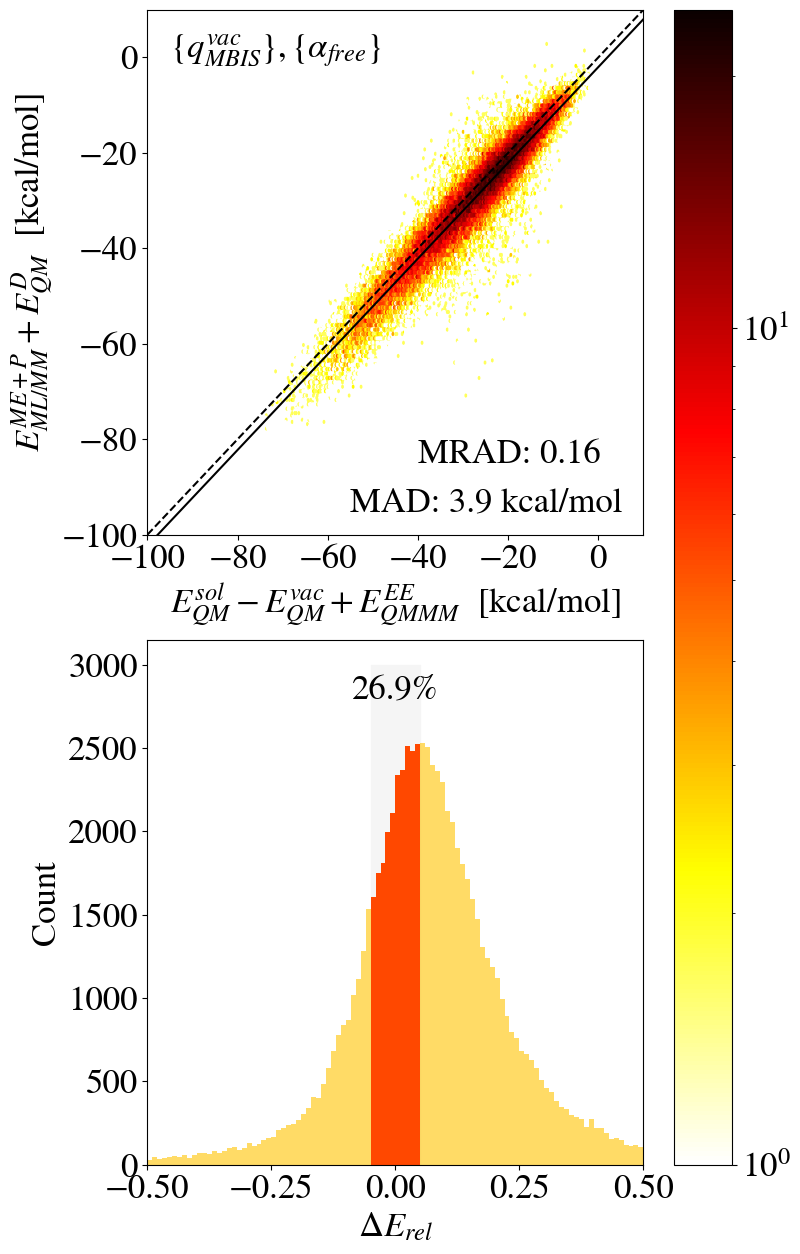

In [57]:
fig, ax = plt.subplots(nrows=2, ncols= 1, figsize=(8,15), sharex='row', sharey='row')
ax[0].set_ylabel(r'$E_{ML/MM}^{ME+P}+E_{QM}^{D}$  [kcal/mol]')
ax[1].set_ylabel('Count')
ax[0].text(-95, 0, '$\{q^{vac}_{MBIS}\} , \{ \\alpha_{free}\}$' )

scheme_ref = 'pbe.delta_qm+ee_qmmm'
scheme='q_mbis_alpha_free_me_pol_dist_energy'

ax[0].set_xlabel(r'$E_{QM}^{sol}-E_{QM}^{vac}+E_{QMMM}^{EE}$  [kcal/mol]')
ax[0].hexbin(energies_df['pbe.delta_qm+ee_qmmm'], energies_df[scheme], bins='log', cmap='hot_r', gridsize=300)
ax[0].set_xlim(min_, max_)
ax[0].set_ylim(min_, max_)
ax[0].plot(np.array([min_, max_]), lineal(np.array([min_, max_]), linear_params_dist[scheme]['slope'], linear_params_dist[scheme]['intercept']) , c=line_color,zorder=1)
ax[0].plot([min_, max_],[min_, max_],ls='--', c=line_color)
ax[0].set_xticks(np.arange(min_, max_, step=20))
ax[0].text(-55, -95, f'MAD: '+str(stats_dist[stats_dist['scheme']==scheme]['err prom'].values[0].round(1))+' kcal/mol' )
ax[0].text(-40, -85, f'MRAD: '+str(stats_dist[stats_dist['scheme']==scheme]['MAE_IDENTITY'].values[0].round(3)))
prom = np.mean(df_norm_qm[scheme])
desvio = np.std(df_norm_qm[scheme])
porcentaje_aceptado = 100*(np.count_nonzero(((energies_df[scheme] - energies_df[scheme_ref])/energies_df[scheme_ref] > -corte) & ((energies_df[scheme] - energies_df[scheme_ref])/energies_df[scheme_ref] < corte)))/len(energies_df)
ax[1].hist(df_norm_qm[scheme], bins=bins, color=color_2, alpha=0.6)
ax[1].hist(df_norm_qm[scheme][(df_norm_qm[scheme] > - corte) & (df_norm_qm[scheme] < corte)], color=color_1, bins=bins)
ax[1].text(0,2800, f'{porcentaje_aceptado:.1f}%', fontsize=25, ha='center', zorder=1)
ax[1].fill_between(np.array([-corte,corte]), 0, 3000, color='whitesmoke', zorder=0)
ax[1].set_xlabel('$\\Delta E _{rel}$')
fig.colorbar(abc, ax=ax.ravel().tolist())    
ax[1].set_xlim(-0.5, 0.5)
#fig.savefig('FS4_corr_ME+P+D.png', bbox_inches='tight')

## Figure S5

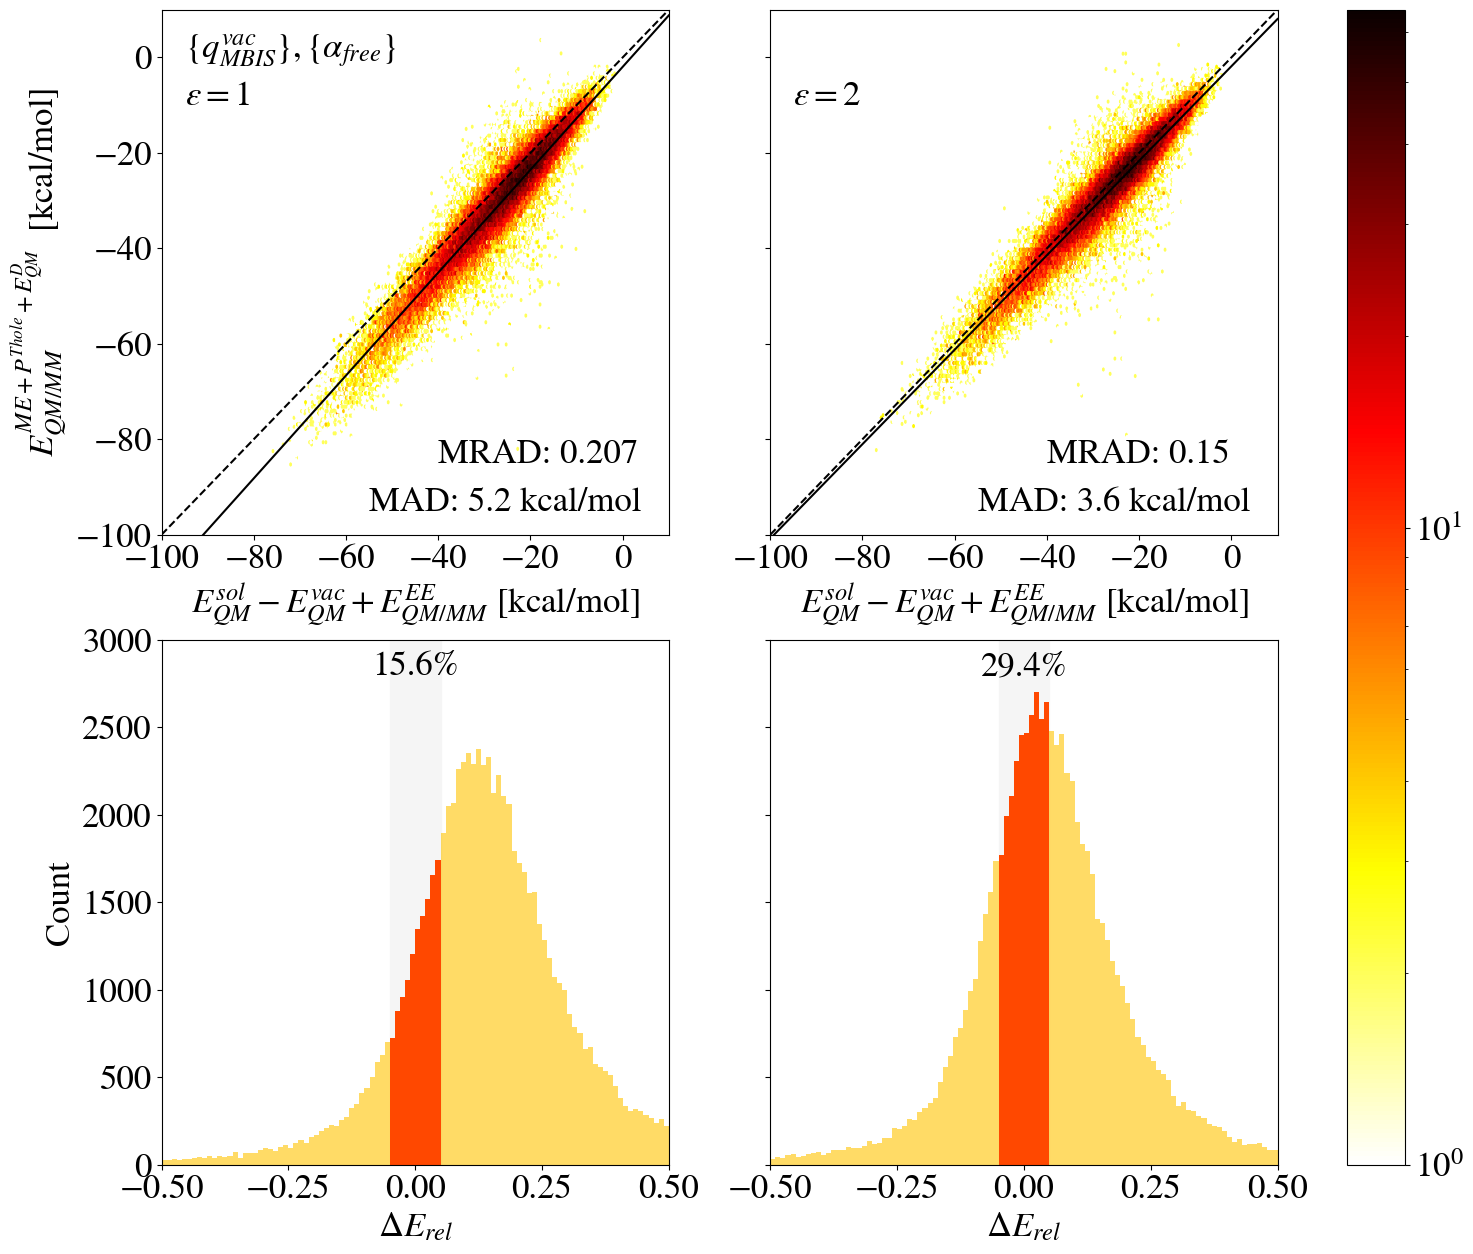

In [58]:
fig, ax = plt.subplots(nrows=2, ncols= 2, figsize=(18,15), sharex='row', sharey='row')

ax[0,0].set_ylabel(r'$E_{QM/MM}^{ME+P^{Thole}+ E_{QM}^{D}}$  [kcal/mol]')
ax[1,0].set_ylabel('Count')


bins=100
data_min = -0.5
data_max =0.5
bins = np.histogram_bin_edges((data_min, data_max), bins=bins)
ylabel=3250
corte=0.05

min_ = -100
max_ = 10
label_x=-90
label_y=-15

scheme_ref = 'pbe.delta_qm+ee_qmmm'
x = energies_df[scheme_ref]
nbins=40
schemes = ['wb97x.mbis_thole_free', 'wb97x.mbis_thole_free_epsilon2']
for i, scheme in enumerate(schemes):
    abc = ax[0,i].hexbin(energies_df['pbe.delta_qm+ee_qmmm'],energies_df[scheme], cmap='hot_r', bins='log', gridsize=300)
    ax[0,i].plot(np.array([min_, max_]), lineal(np.array([min_, max_]), linear_params_dist[scheme]['slope'], linear_params_dist[scheme]['intercept']) , c=line_color,zorder=1)
    ax[0,i].plot([min_, max_],[min_, max_],ls='--', c=line_color)
    ax[0,i].set_xticks(np.arange(min_, max_, step=20))
    ax[0,i].text(-55, -95, f'MAD: '+str(stats_dist[stats_dist['scheme']==scheme]['err prom'].values[0].round(1))+' kcal/mol' )
    ax[0,i].text(-40, -85, f'MRAD: '+str(stats_dist[stats_dist['scheme']==scheme]['MAE_IDENTITY'].values[0].round(3)))
    ax[0,i].set_xlim(min_, max_)
    ax[0,i].set_ylim(min_, max_)
    ax[0,i].set_xlabel('$E_{QM}^{sol}-E_{QM}^{vac}+E_{QM/MM}^{EE}$ [kcal/mol]')
    ax[1,i].set_xlabel('$\\Delta E _{rel}$')
    ax[1,i].set_xlim(-0.5, 0.5)
    ax[1,i].set_ylim(0, 3000)
    prom = np.mean(norm_energies_df[scheme])
    desvio = np.std(norm_energies_df[scheme])
    porcentaje_aceptado = 100*(np.count_nonzero(((energies_df[scheme] - energies_df[scheme_ref])/energies_df[scheme_ref] > -corte) & ((energies_df[scheme] - energies_df[scheme_ref])/energies_df[scheme_ref] < corte)))/len(energies_df)
    ax[1,i].hist(df_norm_qm[scheme], bins=bins, color=color_2, alpha=0.6)
    ax[1,i].hist(df_norm_qm[scheme][(df_norm_qm[scheme] > - corte) & (df_norm_qm[scheme] < corte)], color=color_1, bins=bins)
    ax[1,i].text(0,2800, f'{porcentaje_aceptado:.1f}%', fontsize=25, ha='center', zorder=1)
    ax[1,i].fill_between(np.array([-corte,corte]), 0, 3000, color='whitesmoke', zorder=0)

ax[0,0].text(-95, 0, '$\{q^{vac}_{MBIS}\} , \{ \\alpha_{free}\}$' )
ax[0,0].text(-95, -10, '$\epsilon =1$' )
ax[0,1].text(-95, -10, '$\epsilon =2$' )


#ax[0,0].text(-95, -10, r'$\\epsilon =1$')
#ax[1,0].text(-95, -10, r'$\\epsilon =2$')
fig.colorbar(abc, ax=ax.ravel().tolist())
#fig.savefig('FS5_corr_ME_mull_Thole_free.png', bbox_inches='tight')

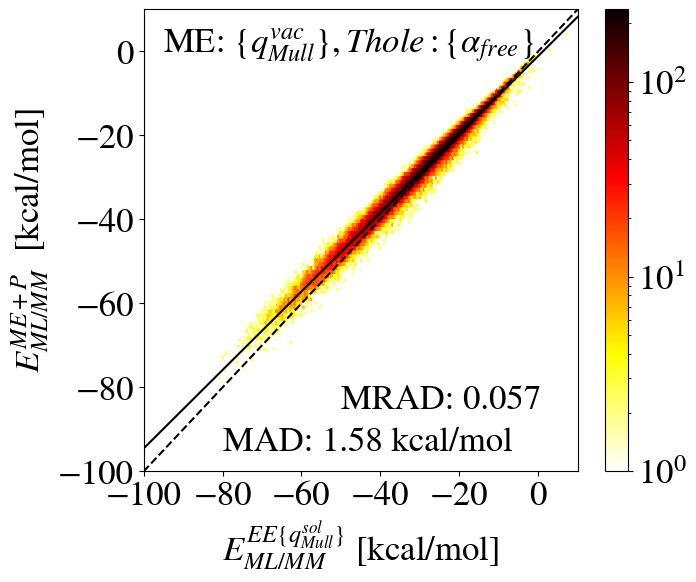

In [60]:
fig, ax = plt.subplots(figsize=(7,6))
ax.set_ylabel('$E_{ML/MM}^{ME+P}$  [kcal/mol]')
ax.set_xlabel('$E_{ML/MM}^{EE \{q^{sol}_{Mull}\}}$ [kcal/mol]')
min_ = -100
max_ = 10
label_x=-90
label_y=-15

ax.set_xlim(min_, max_)
ax.set_ylim(min_, max_)
line_color = 'k'
ax.set_xticks(np.arange(min_, max_, step=20))
ax.text(-95, 0,  'ME: $\{q^{vac}_{Mull}\}, Thole: \{\\alpha_{free}\}$')
scheme = 'pbe.mull_thole_free'
abc = ax.hexbin(energies_df['pbe.mullsolvated_me_qmmm_energy'],energies_df[scheme], cmap='hot_r', bins='log', gridsize=300)
ax.text(-80, -95, f'MAD: '+str(stats_mull[stats_mull['scheme']==scheme]['err prom'].values[0].round(2))+' kcal/mol' )
ax.text(-50, -85, f'MRAD: '+str(stats_mull[stats_mull['scheme']==scheme]['MAE_IDENTITY'].values[0].round(3)))
ax.plot(np.array([min_, max_]), lineal(np.array([min_, max_]), linear_params_mull[scheme]['slope'], linear_params_mull[scheme]['intercept']) , c=line_color,zorder=1)
ax.plot([min_, max_],[min_, max_],ls='--', c=line_color)
fig.colorbar(abc)#, ax=ax.ravel().tolist())

#fig.savefig('fs6_corr_sol_vac_thole.png', bbox_inches='tight')